# Second Law of Thermodynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotting as myplt

Four equivalent statements of the 2nd Law:

1. Entropy is a state function that increases for all spontaneous processes ($\Delta S_{univ} > 0$). $\Delta S = \int \frac{\delta q_{rev}}{T}$.  The functin $\frac{q}{T}$ is maximized for a reversible process.

2. Spontaneous changes are those from which work can be extracted.  If done reversibly, the they yield a maximum amount of work.

3. Heat spontaneously flows from hot to cold and not in the reverse direction. 

4. $dS \geq \frac{\delta q}{T}$ where $S$ is entropy and the equality holds for a reversible process.

## Entropy is a State Function

We will prove that an additional state function exists.  We will call it entropy.

A state function other that internal energy and enthalpy must exist.  The proof is as follows.

\begin{align}
dU =& \delta q + \delta w \\
   =& \delta q_{rev} - PdV
\end{align}

where the last equality is for a reversible process for which there is only $PV$ work.  Since the left-hand side of this equation is the differential of a state function ($dU$), we are free to follow any desired path. We now, however, dictate that the system is an ideal gas meaning $dU = C_VdT$ and $P=\frac{nRT}{B}$:

\begin{align}
dU =& C_VdT = \delta q_{rev} - \frac{nRT}{V}dV \\
\Rightarrow \delta q_{rev} =& C_VdT + \frac{nRT}{V}dV
\end{align}

where I have solved the top equation for $\delta q_{rev}$ to achieve the bottom equation.  Now I will divide this bottom equation by $T$ to achieve a separation of variables:

\begin{align}
\frac{\delta q_{rev}}{T} =& \frac{C_V}{T}dT + \frac{nR}{V}dV
\end{align}

Integrating both sides of this equation yields

\begin{align}
\int\frac{\delta q_{rev}}{T} =& \int_{T_1}^{T_2}\frac{C_V}{T}dT + \int_{V_1}^{V_2}\frac{nR}{V}dV \\
=& C_V\ln\left(\frac{T_2}{T_1}\right) + nR\ln\left( \frac{V_2}{V_1} \right)
\end{align}

We note that the right hand side (rhs) of this equation is a state function.  This can be inferred because it only depends on the final state ($V_2$ and $T_2$) and initial state ($V_1$ and $T_1$).  Since the rhs of the equaution is a state function, the lhs of the equation must also be a state function.  We call this the change in entropy:

\begin{equation}
\Delta S = \int\frac{\delta q_{rev}}{T}
\end{equation}

or

\begin{equation}
d S = \frac{\delta q_{rev}}{T}
\end{equation}

## Example

Let's consider an expansion/contraction of an ideal gas and compute the heat and entropy along two different paths

Compute $q_{sys}$ and $\Delta S_{sys}$ for the isothermal expansion of a gas from $V_1$ to $V_2=2V_1$ if done:

(a) Reversibly

(b) Against constant external pressure $P_{ext} = P_2$

(a) Reversible isothermal expansion from $V_1$ to $V_2=2V_1$:

Start by computing $q_{sys}$:

\begin{align}
q_{sys}^{(a)} = &nRT\ln\left(\frac{V_2}{V_1}\right)\\
 = & nRT\ln\left(\frac{2V_1}{V_1}\right)\\
 = & nRT\ln2
\end{align}

Note that $q_{sys}^{(a)}>0$ meaning that the surroundings are providing heat to the system to cause this expansion.

Now $\Delta S$

\begin{align}
\Delta S_{sys} = & \frac{\delta q_{rev}}{T} \\
= & \frac{nRT\ln2}{T} \\
= & nR\ln2
\end{align}

(b) Expansion from $V_1$ to $V_2$ against constant external pressure $P_{ext} = P_2$

Again, we start by computing $q_{sys}^{(b)}$:

\begin{align}
\Delta U_sys &= 0 = q_{sys}^{(b)} + w_{sys}^{(b)} \\
\Rightarrow q_{sys}^{(b)} &= - w_{sys}^{(b)} \\
&=  P_2\Delta V \\
\end{align}

Now plug in $P_2 = \frac{nRT}{V_2}$ and $\Delta V = V_2 - V_1 = \frac{1}{2}V_2$:

\begin{align}
 q_{sys}^{(b)} &= P_2\Delta V \\
&=  \frac{nRT}{V_2}\frac{V_2}{2} \\
&=  \frac{nRT}{2} \\
\end{align}

Since entropy is a state function we still have:

\begin{align}
\Delta S_{sys} = nR\ln2
\end{align}

Compare part (a) and part (b):

Entropies are identical since entropy is a state function.

Heat:

\begin{align}
q_{sys}^{(a)} = & nRT\ln2 \\
q_{sys}^{(b)} =& \frac{nRT}{2} 
\end{align}

Which is bigger?  

\begin{align}
\frac{q_{sys}^{(a)}}{q_{sys}^{(b)}} = & \frac{nRT\ln2}{\frac{nRT}{2}} \\
 =& 2\ln2 \\
 \approx & 1.386 > 1
\end{align}

Thus we see that $q$ is larger for the reversible process (a) than the irreversible process (b).  Equivalently, $-w$, the extractable work, is maximized in process (a).

## Carnot Cycle (again)

Compute the change in entropy ($\Delta S$) for each step along the Carnot cycle and show that $\Delta S_{total} = 0$.

In [2]:
def plot_PV_diagram_adiabat(n=1,R=0.08206,V=np.arange(0.5,7.1,0.1),pUnit="atm",vUnit="L",T1=100,T2=200):
    xlabel = "V (" + vUnit + ")"
    ylabel = "P (" + pUnit + ")"
    fig, ax = myplt.define_figure(xlabel=xlabel,ylabel=ylabel)
    label = "T$_1$=" + str(T1)+" K"
    ax.plot(V,n*R*T1/V,label=label,lw=4)
    label = "T$_2$=" + str(T2)+" K"
    ax.plot(V,n*R*T2/V,label=label,lw=4)
    # adiabat 1
    lowV = (T1*1.5**(2/3)/T2)**(3/2)
    highV = 1.5
    Vadiabat1 = np.arange(lowV,highV+0.1,0.1)
    ax.plot(V,n*R*T1*1.5**(2/3)/V**(5/3),label="Adiabat 1",lw=4)
    ax.plot(Vadiabat1,n*R*T1*1.5**(2/3)/Vadiabat1**(5/3),lw=1,c="k")
    label = "(" + str(1.5) +","+ str(np.round(n*R*T1/1.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_1$,P$_1$,T$_1$)"
    ax.annotate(label,xy=(0.5,n*R*T1/1.5-1),fontsize=16)
    plt.scatter(1.5,n*R*T1/1.5,s=50,color="tab:blue")
    label = "(" + str(1.5) +","+ str(np.round(n*R*T2/1.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_2$,P$_2$,T$_2$)"
    plt.scatter(lowV,n*R*T2/lowV,s=50,color="tab:orange")
    ax.annotate(label,xy=(lowV+0.05,n*R*T2/lowV),fontsize=16)
    ax.annotate("A",xy=(0.4,n*R*T1/1.5+ 0.5*(n*R*T2/lowV-n*R*T1/1.5)),fontsize=24)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T2/2.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_3$,P$_3$,T$_2$)"
    # adiabat 2
    lowV2 = 2.5
    highV2 = (T2*2.5**(2/3)/T1)**(3/2)
    Vadiabat2 = np.arange(lowV2,highV2+0.1,0.1)
    ax.plot(V,n*R*T2*2.5**(2/3)/V**(5/3),label="Adiabat 2",lw=4)
    ax.plot(Vadiabat2,n*R*T2*2.5**(2/3)/Vadiabat2**(5/3),lw=1,c="k")
    plt.scatter(2.5,n*R*T2/2.5,s=50,color="tab:orange")
    ax.annotate(label,xy=(2.6,n*R*T2/2.5),fontsize=16)
    ax.annotate("B",xy=(1.5,n*R*T2/2+3),fontsize=24)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T1/2.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_4$,P$_4$,T$_1$)"
    plt.scatter(highV2,n*R*T1/highV2,s=50,color="tab:blue")
    ax.annotate(label,xy=(highV2,n*R*T1/highV2),fontsize=16)
    ax.annotate("C",xy=(4.25,3.0),fontsize=24)
    ax.annotate("D",xy=(3,n*R*T1/2-3.0),fontsize=24)
    #ax.annotate('',xytext=(1.5,n*R*T1/1.5),xy=(1.5,n*R*T2/1.5),arrowprops={'arrowstyle':"-",'lw': 2, 'color': 'black'})
    #ax.annotate('',xytext=(2.5,n*R*T1/2.5),xy=(2.5,n*R*T2/2.5),arrowprops={'arrowstyle':"-",'lw': 2, 'color': 'black'})
    #ax.annotate('',xy=(2.5,5.0),xytext=(2.5,5.1),arrowprops={'arrowstyle': 'simple','lw': 2, 'color': 'black'})
    #ax.annotate('',xy=(1.5,8.2),xytext=(1.5,8.1),arrowprops={'arrowstyle': 'simple','lw': 2, 'color': 'black'})
    vsub = np.arange(lowV,2.51,0.01)
    ax.plot(vsub,n*R*T2/vsub,lw=1,c="k")
    vsub = np.arange(1.5,highV2+0.01,0.01)
    ax.plot(vsub,n*R*T1/vsub,lw=1,c="k")
    ax.fill_between(np.arange(1.5,2.51,0.01),n*R*T1/np.arange(1.5,2.51,0.01),n*R*T2/np.arange(1.5,2.51,0.01),facecolor="purple",alpha=0.5,interpolate=True)
    ax.fill_between(np.arange(lowV,1.51,0.01),n*R*T2/np.arange(lowV,1.51,0.01),n*R*T1*1.5**(2/3)/np.arange(lowV,1.51,0.01)**(5/3),facecolor="purple",alpha=0.5,interpolate=True)
    ax.fill_between(np.arange(2.5,highV2+0.01,0.01),n*R*T2*2.5**(2/3)/np.arange(2.5,highV2+0.01,0.01)**(5/3),n*R*T1/np.arange(2.5,highV2+0.01,0.01),facecolor="purple",alpha=0.5,interpolate=True)
    ax.set_ylim(0,35)
    plt.legend(fontsize=16)

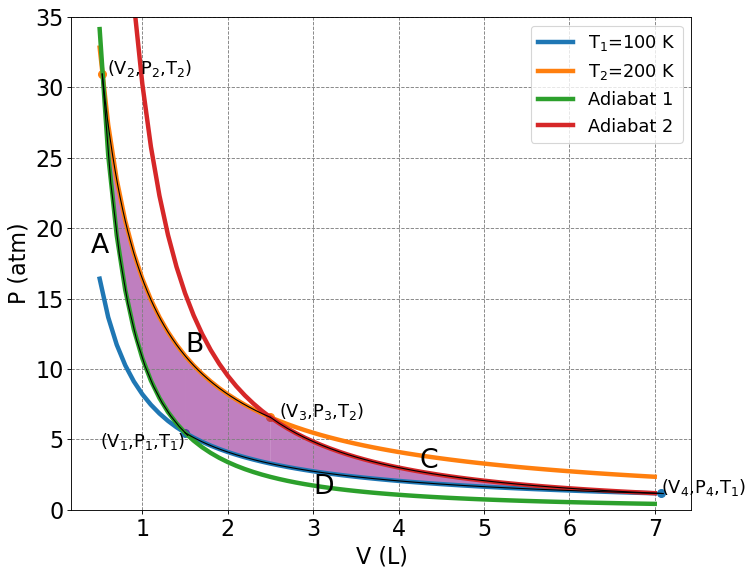

In [3]:
plot_PV_diagram_adiabat()

### $A$ : Reversible Adiabatic Contraction

Since the process is reversible and $q_A = 0$, we have

\begin{equation}
\Delta S_A = 0
\end{equation}

### $B$ : Reversible Isothermal Expansion

Since the process is reversible and $q_B = nRT_2\ln\left(\frac{V_3}{V_2}\right)$, we have

\begin{align}
\Delta S_B &= \frac{q_{B,rev}}{T_B} \\
&= \frac{nRT_2\ln\left(\frac{V_3}{V_2}\right)}{T_2} \\
&= nR\ln\left(\frac{V_3}{V_2}\right) 
\end{align}

### $C$ : Reversible Adiabatic Expansion

Since the process is reversible and $q_C = 0$, we have

\begin{equation}
\Delta S_C = 0
\end{equation}

### $D$ : Reversible Isothermal Contraction

Since the process is reversible and $q_D = nRT_1\ln\left(\frac{V_1}{V_4}\right)$, we have

\begin{align}
\Delta S_D &= \frac{q_{D,rev}}{T_D} \\
&= \frac{nRT_1\ln\left(\frac{V_1}{V_4}\right)}{T_1} \\
&= nR\ln\left(\frac{V_1}{V_4}\right) 
\end{align}

### Summary

| Process                    | $w$                            | $q$                 | $\Delta U$                 | $\Delta H$ | $\Delta S$
| :------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- |
| A - Adiabatic Contraction      | $\frac{3}{2}nR(T_2-T_1)$                                    | $0$ | $\frac{3}{2}nR(T_2-T_1)$             | $\frac{5}{2}nR(T_2-T_1)$ | $0$               |
| B - Isothermal Expansion   | $nRT_2\ln\left(\frac{V_2}{V_3}\right)$ | $nRT_2\ln\left(\frac{V_3}{V_2}\right)$ | $0$                 | $0$ | $nR\ln\left(\frac{V_3}{V_2}\right)$
| C - Adiabatic Expansion      | $\frac{3}{2}nR(T_1-T_2)$                                     | $0$ | $\frac{3}{2}nR(T_1-T_2)$                   | $\frac{5}{2}nR(T_1-T_2)$ | $0$ |
| D - Isothermal Contraction | $nRT_1\ln\left(\frac{V_4}{V_1}\right)$ | $nRT_1\ln\left(\frac{V_1}{V_4}\right)$ | $0$ | $0$ | $nR\ln\left(\frac{V_1}{V_4}\right)$ |

### Efficiency

For a heat engine ($w_{total}<0$), the efficiency is the amount of work extracted, $w_{total}$, divided by the energy in put, $q_{in}$.

$\varepsilon = \frac{w_{total}}{q_{in}}$

For the Carnot cycle, this becomes:

$\varepsilon = \frac{T_h-T_c}{T_h}$